## Explaination

In this notebook, the main goal is to visualize the significant wave height of the select area. As mentioned in the proposal, the environments will influence the transportation of LNG. Among all the factors, the wave height is very critical to the safety. Generally we are looking for a path that has smallest wave height.

Considering the limitation of time, here we only visualize the data, then do a visual inspection to find the relative "peace" (low wave height) area, a sample image is at the end of this notebook

## Import Environments

In [10]:
import os
os.environ['PROJ_LIB'] = '/Users/Krasus/miniconda3/envs/Wave/share/proj'

from pathlib import Path
import pygrib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from IPython.display import Image

## Input Option

In [ ]:
Date=input('Enter:yyyyMM\n')
#type=input('Enter wave attribute name\n')
type="hs"
target = 'multi_1.glo_30m.'+type+'.'+Date+'.grb2'
datapath = './'+Date+'/gribs/'+target
print('Visulizing data in:'+datapath)

## Output Define

In [ ]:
name= 'significant wave height (m)'
outpath='./AnalysisResult/'+Date+'/'
print('Store in: '+outpath)
Path(outpath).mkdir(parents=True, exist_ok=True)
gribs = pygrib.open(datapath)

## set up range

In [ ]:
llclon=122.04945
llclat=2.05
urclon=240.35024
urclat=63.50602

## Processing data

In [7]:
for grib in gribs:
    grib
M_Num = gribs.tell()


for N in range(M_Num):
    plt.figure(figsize=(10.8,7.2),dpi=326)
    grb=gribs.select(name='Significant height of combined wind waves and swell')[N]
    data,lat,lon=grb.data(llclat,urclat,llclon,urclon)
    m = Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(),urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(),resolution='c')
    x,y = m(lon,lat)
    ave=data.mean()
    m.pcolormesh(x,y,data, shading='flat', cmap=plt.cm.jet)
    m.drawcoastlines()
    m.fillcontinents()
    m.drawmapboundary()
    m.drawstates()
    m.colorbar(location='right')
    pname=str(grb.validDate)
    extension='.png'
    plt.title("{Date} Average  Significant Wave height = {wave_ave:.2f} m".format(Date=grb.validDate, wave_ave=ave))
    plt.savefig(outpath+pname+extension,dpi=326)
    plt.clf()
    plt.close()
    print('Output'+pname+' Successful!')
gribs.close()

Enter:yyyyMM
201801
Visulizing data in:./201801/gribs/multi_1.glo_30m.hs.201801.grb2
Store in: ./AnalysisResult/201801/
Output2018-01-01 00:00:00 Successful!
Output2018-01-01 03:00:00 Successful!
Output2018-01-01 06:00:00 Successful!
Output2018-01-01 09:00:00 Successful!
Output2018-01-01 12:00:00 Successful!
Output2018-01-01 15:00:00 Successful!
Output2018-01-01 18:00:00 Successful!
Output2018-01-01 21:00:00 Successful!
Output2018-01-02 00:00:00 Successful!
Output2018-01-02 03:00:00 Successful!
Output2018-01-02 06:00:00 Successful!
Output2018-01-02 09:00:00 Successful!
Output2018-01-02 12:00:00 Successful!
Output2018-01-02 15:00:00 Successful!
Output2018-01-02 18:00:00 Successful!
Output2018-01-02 21:00:00 Successful!
Output2018-01-03 00:00:00 Successful!
Output2018-01-03 03:00:00 Successful!
Output2018-01-03 06:00:00 Successful!
Output2018-01-03 09:00:00 Successful!
Output2018-01-03 12:00:00 Successful!
Output2018-01-03 15:00:00 Successful!
Output2018-01-03 18:00:00 Successful!
Output

Output2018-01-27 12:00:00 Successful!
Output2018-01-27 15:00:00 Successful!
Output2018-01-27 18:00:00 Successful!
Output2018-01-27 21:00:00 Successful!
Output2018-01-28 00:00:00 Successful!
Output2018-01-28 03:00:00 Successful!
Output2018-01-28 06:00:00 Successful!
Output2018-01-28 09:00:00 Successful!
Output2018-01-28 12:00:00 Successful!
Output2018-01-28 15:00:00 Successful!
Output2018-01-28 18:00:00 Successful!
Output2018-01-28 21:00:00 Successful!
Output2018-01-29 00:00:00 Successful!
Output2018-01-29 03:00:00 Successful!
Output2018-01-29 06:00:00 Successful!
Output2018-01-29 09:00:00 Successful!
Output2018-01-29 12:00:00 Successful!
Output2018-01-29 15:00:00 Successful!
Output2018-01-29 18:00:00 Successful!
Output2018-01-29 21:00:00 Successful!
Output2018-01-30 00:00:00 Successful!
Output2018-01-30 03:00:00 Successful!
Output2018-01-30 06:00:00 Successful!
Output2018-01-30 09:00:00 Successful!
Output2018-01-30 12:00:00 Successful!
Output2018-01-30 15:00:00 Successful!
Output2018-0

## Display Sample Image

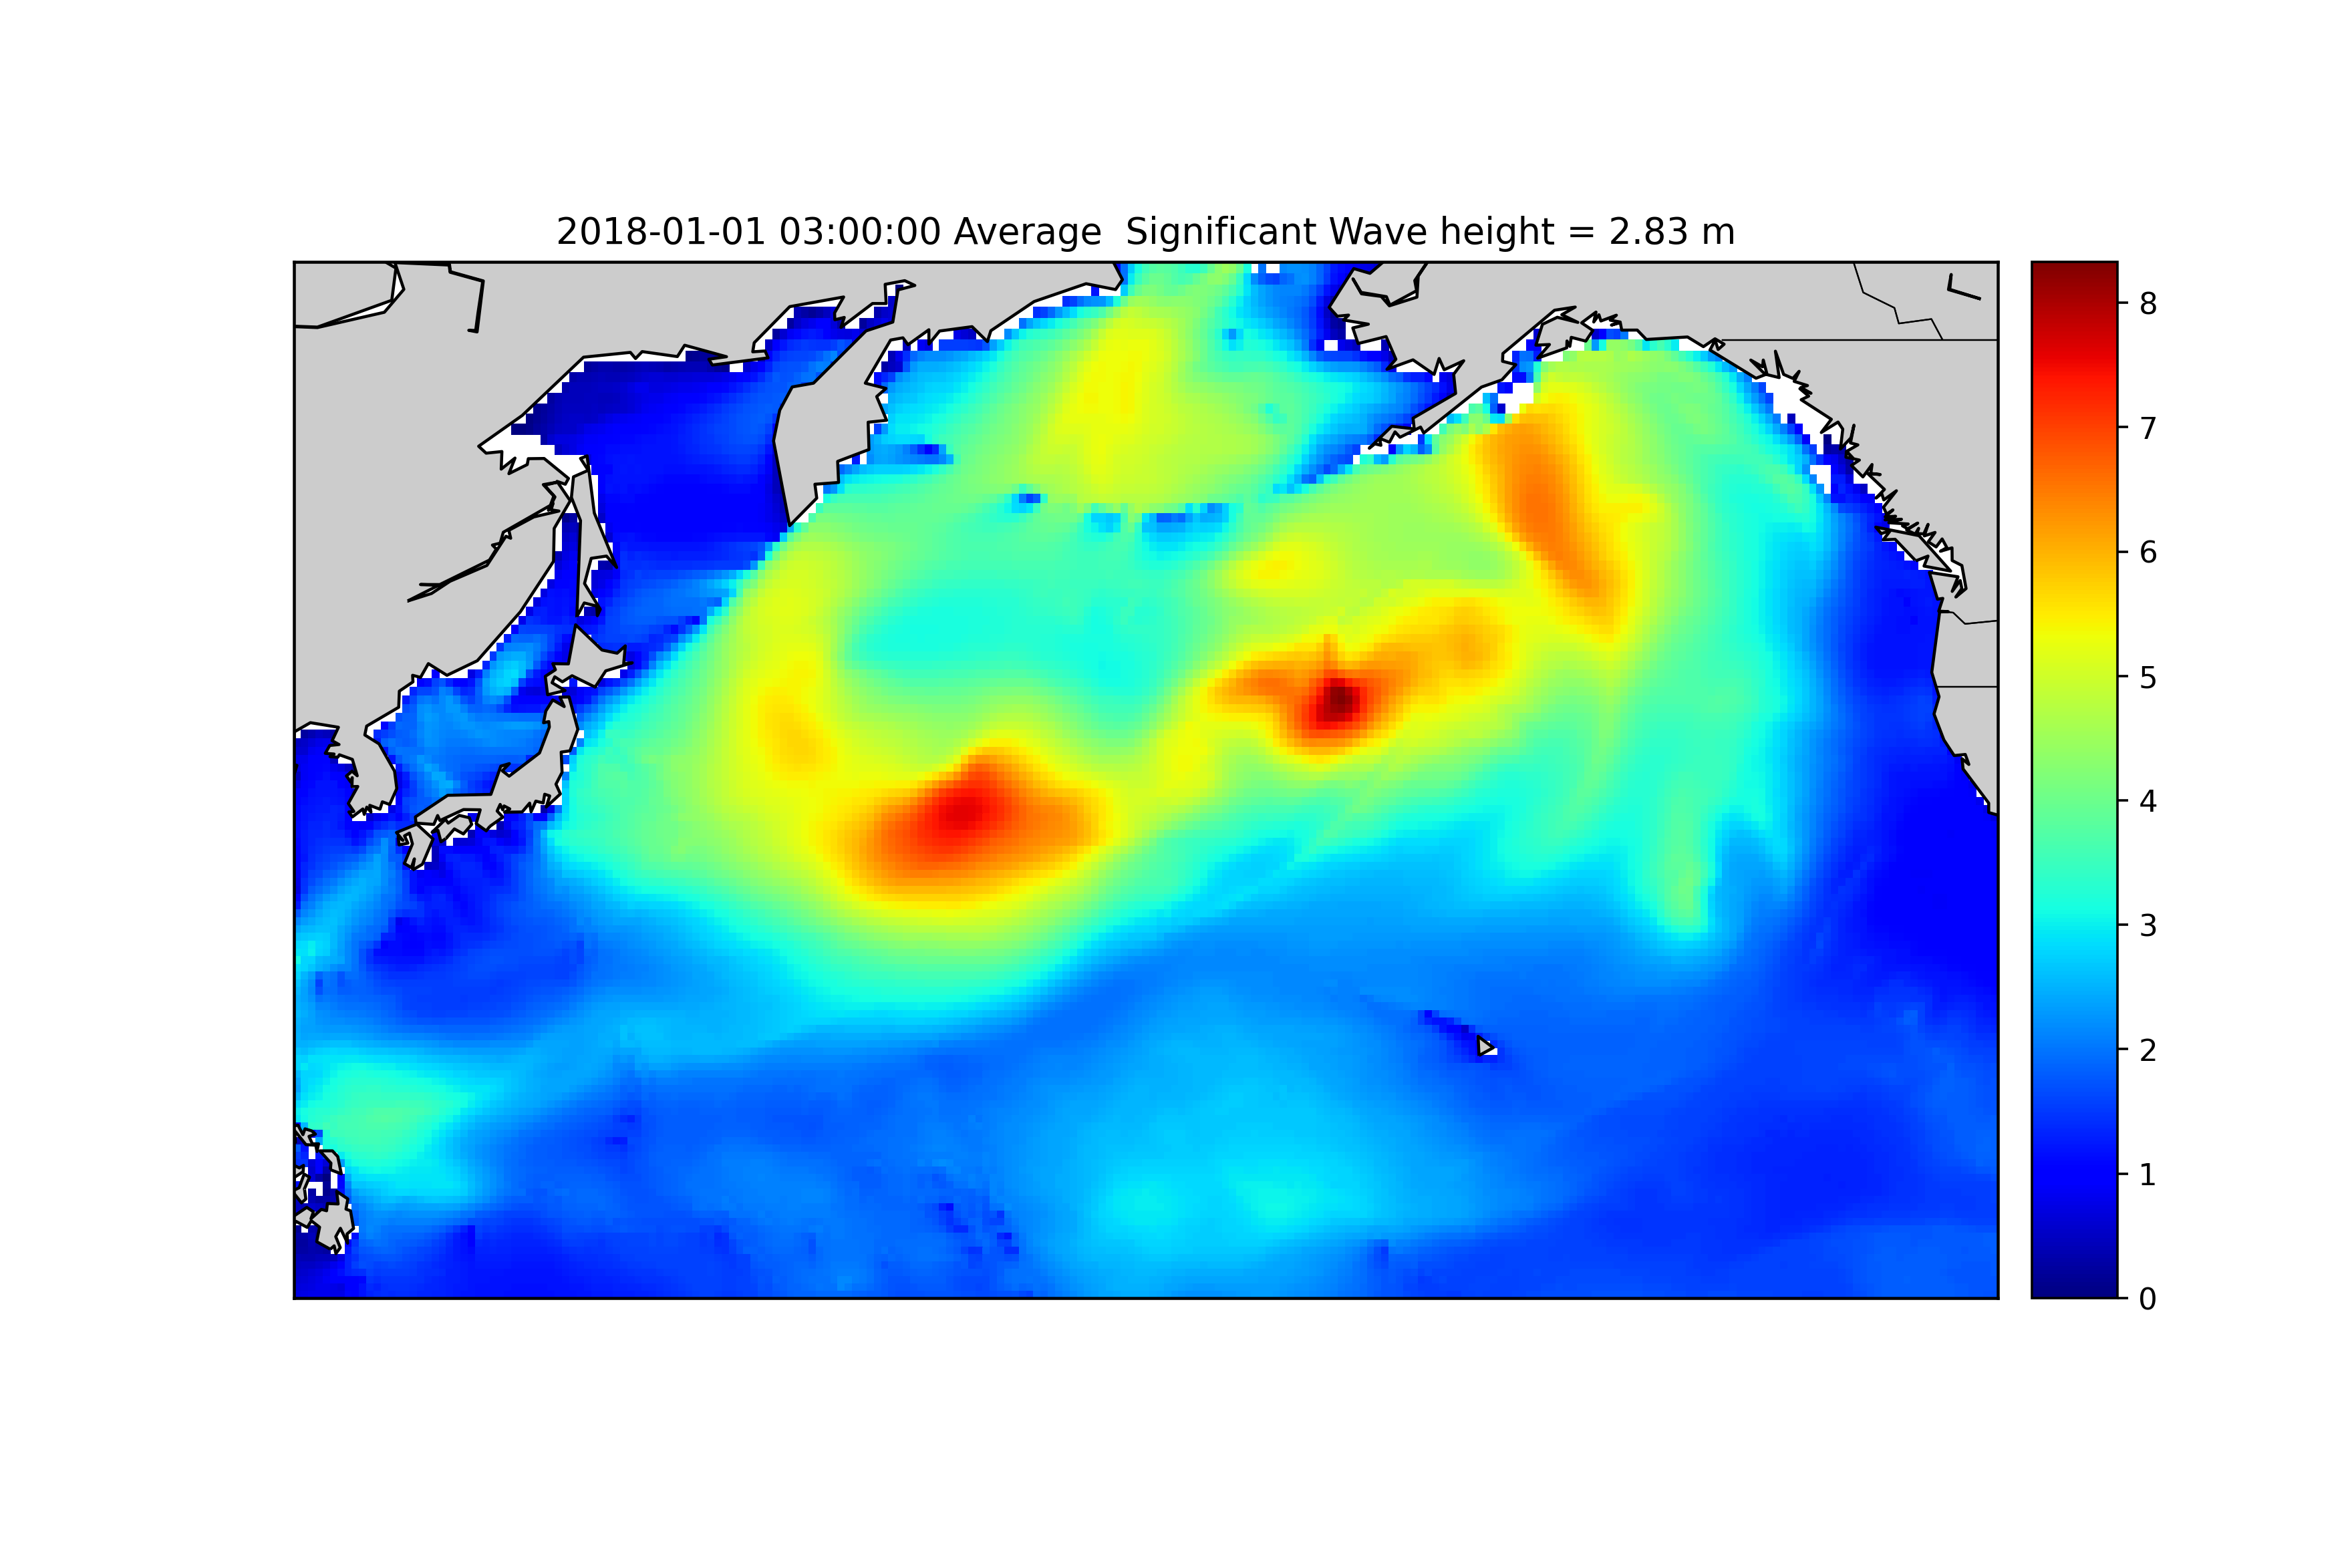

In [13]:
Image(filename='./AnalysisResult/201801/2018-01-01_03_00_00.png')